
<img src="samling3.jpg" width="100%" alt="A 100x100 image">

## Numeriske motoder

* Numerisk derivasjon
* Numerisk løsning av likninger
* Numerisk integrasjon

In [1]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/m/ZgkSsm7B', width=1100, height=600)

In [2]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/m/dhMrc6r2', width=900, height=650)

## Vi finner den momentane vekstfarten i et punkt


## Eksempler 

Funksjonen $f$ er gitt ver $f(x)=x^3-4x$. 

* Hva er den momentane vekstfargen i $x=2$? 

In [3]:
def f(x):
    return x**3-4*x

m = (f(2.000001)-f(2))/0.000001
m


8.000006001651627

In [4]:

def Df(x, h=0.00001):
    return (f(x+h)-f(x))/h

Df(2, h=0.000000001)

8.000000661922968

## Oppgave 1

Tegn grafen til $f$ og grafen til $f'$ når $f(x)=e^{-x^2}$

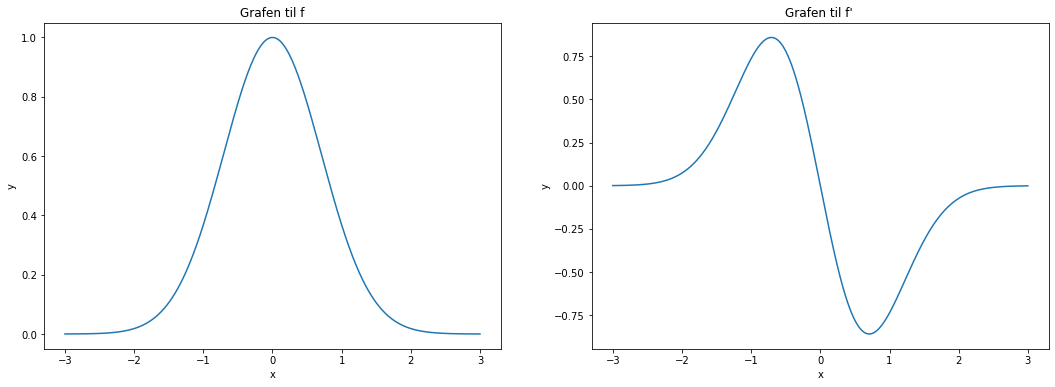

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

def f(x):
    return np.exp(-x**2)

def df(x, h = 0.00001):
    return (f(x+h)-f(x))/h

def g(x):
    return -2*x * np.exp(-x**2)

X = np.linspace(-3, 3, 600)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(X, f(X))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafen til f")


plt.subplot(1, 2, 2)
plt.plot(X, df(X))
#plt.plot(X, g(X))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafen til f' ")

plt.show()



## Ekempel

Funksjonen $f$ er gitt ved 

$$
f(x) = 
\begin{cases}
    x^3 , &\quad x<1 \\
    -x^2+5x-3 , &\quad x\geq 1
\end{cases}
$$

a) Tegn grafen til $f$ og grafen til $f'$.

b) Er $f$ deriverbar i $x=1$?

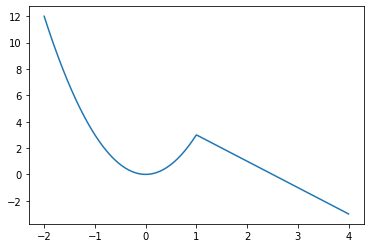

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
def df(x, h = 0.00001):
    return (f(x+h)-f(x))/h

def f(x):
    if x < 1:
        return x**3
    else:
        return -x**2+5*x-3

X = np.linspace(-2, 4, 600)
Y = []
for i in X:
    Y.append(df(i))
plt.plot(X, Y)
plt.show()

## Oppgave 2

Lag et program som regner ut den dobbeltderiverte i et punkt. Input skal være en funksjon og en x-verdi. Output skal være en god tilnærmingsverdi (om denne finnes) for den dobbeltderiverte. 

Test programmet ved å plotte grafen til den dobbeltderiverte til funksjonen

   $f(x)=\dfrac{x+1}{x^2+1}$  ,   $D_f= [-2, 2]$
   
   Plott også grafen til den analytisk dobbeltderiverte i samme koordinatsystem.

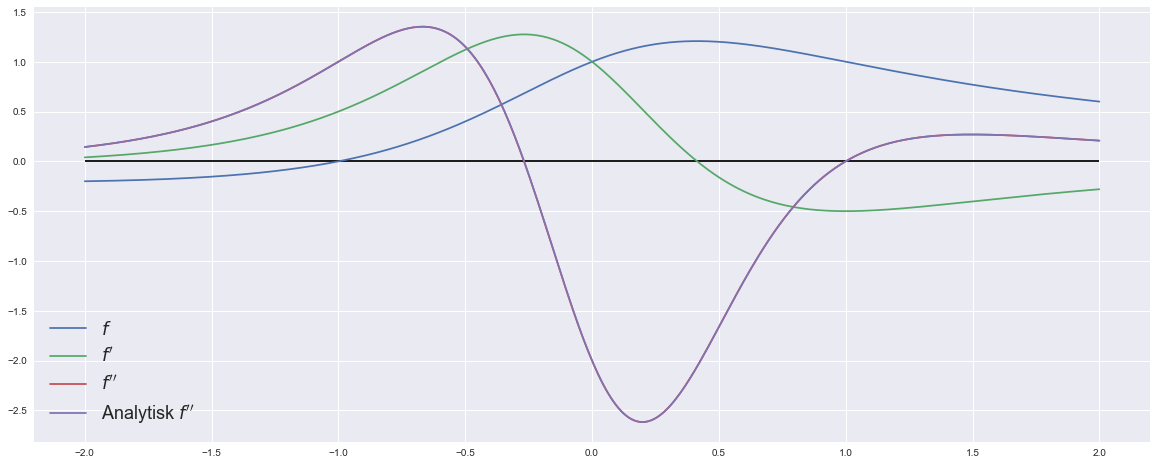

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

def f(x):
    return (x+1)/(x**2+1) 

def df(x, h=1E-8):
    return (f(x+h)-f(x))/h

def ddf(x, h=1E-3):
    return (df(x+h)-df(x))/h

def af(x):
    return 2*(x-1)*(x**2+4*x+1)/(x**2+1)**3

X = np.linspace(-2, 2, 400)
plt.style.use("seaborn")
plt.figure(figsize=(20, 8))
plt.plot(X, f(X), label=r"$f$")
plt.plot(X, df(X), label=r"$f'$")
plt.plot(X, ddf(X), label=r"$f''$ ")
plt.plot(X, af(X), label=r"Analytisk $f''$ ")
plt.legend(fontsize=18)

plt.hlines(0, -2, 2)
plt.show()

## Numerisk løsning av likninger
<img src="mathematics-g8b4e6daa0_1280.jpg" width="100%" alt="A 100x100 image">



## Eksempel 1

Løs likningen $3000\cdot 1.018^x = 5000$. 


In [8]:
def f(x):
    return 3000 * 1.018**x

x = 10
while f(x)<5000:
    x = x + 0.001

print(x)
print(f(x))

28.634000000012115
5000.012959621074


## Eksempel 2

Vi ønsker å finne alle nullpunktene til funksjonen $f(x)=e^x-x-\dfrac{3}{2}$. 

* Hvor mange nullpunkt kan funksjonen ha? 

* Hvilket intervall vil vi lete i? 

* Kan vi lage en algoritme som finner alle? 

In [9]:
import ipywidgets as widgets 
import numpy as np  #
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)-x-3/2
plt.style.use("seaborn")

@widgets.interact(d=(0, 2, 0.01), n=(0, 50, 1), x0=(-3, 2, 0.1))
def diskret(x0=-3, n=0, d=0.5):
    plt.figure(figsize=(12, 6))
    X = np.linspace(-3, 2.5, 100)
    plt.ylim(-1, 2)
    plt.plot(X, f(X))
    plt.hlines(0, -3, 2.5, color="black")
    if f(x0+n*d)>0:
        plt.scatter(x0+n*d, 0, color="g", s=100)
    else:
        plt.scatter(x0+n*d, 0, color="r", s=100)
    if f(x0+(n+1)*d)>0:
        plt.scatter(x0+(n+1)*d, 0, color="g", s=100)
    else:
        plt.scatter(x0+(n+1)*d, 0, color="r", s=100)
    plt.text(x0+n*d, -.3, r"$x_0$", fontdict={"fontsize": 20}, horizontalalignment="center")
    plt.text(x0+(n+1)*d, .2, r"$x_0+d$",
         fontdict={"fontsize": 20}, horizontalalignment="center")


interactive(children=(FloatSlider(value=-3.0, description='x0', max=2.0, min=-3.0), IntSlider(value=0, descrip…

In [10]:
import numpy as np

def f(x):
    return np.exp(x)-x-3/2

d = 0.0001
x = -2

while x+d <= 1:
    if f(x)*f(x+d)<=0:
        print(f"Det er et nullpunkt i x = {x+d/2:0.4f}")
    x = x + d

Det er et nullpunkt i x = -1.1983
Det er et nullpunkt i x = 0.8576


## Oppgave 3

Bruk metoden med diskretisering til å finne løsninger til likningene nedenfor. 

Du skal finne løsningene med tre desimalers nøyaktighet.

a) $x^3-3x=0$

b) $ \cos x = x$

c) $e^{-x^2} = \dfrac 1 2$

In [11]:
import numpy as np

def f(x):
    return x**3-3*x

d = 0.0001
x = -2

while x+d <= 2:
    if f(x)*f(x+d)<=0:
        print(f"Det er et nullpunkt i x = {x+d/2:0.4f}")
    x = x + d

Det er et nullpunkt i x = -1.7321
Det er et nullpunkt i x = 0.0000
Det er et nullpunkt i x = 1.7320


## Fikspunktiterasjon 


>  __Definisjon__  
> Gitt en funksjon $f$ med definisjonsmengde $D_f$. 
> Vi sier at et punkt $r\in D_f$ er et fikspunkt til $f$ dersom $f(r)=r$.

In [49]:
def plot_cobweb(f, x0, nmplt=40, xminimum=-1, xmaximum=2, yminimum=-3, ymaximum=4):
    x = np.linspace(xminimum, xmaximum, 500)
    plt.figure(figsize=(14, 8))
    plt.xlim(xminimum, xmaximum)
    plt.ylim(yminimum, ymaximum)
    # Plot y = f(x) and y = x
    plt.plot(x, f(x), lw=2, color='r')
    plt.plot(x, x, c='g', lw=2)
    plt.scatter(x0, 0, c='b', s=100)
    # Iterate x = f(x) for nmplt steps, starting at (x0, 0).
    px, py = np.empty((2, nmplt+1, 2))
    px[0], py[0] = x0, 0
    for n in range(1, nmplt, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1])
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    plt.plot(px, py, c='b', alpha=0.7)
    plt.hlines(0, xminimum, xmaximum, color='#444444', lw=2)
    plt.vlines(0, yminimum, ymaximum, color='#444444', lw=2)
    # Annotate and tidy the plot.
    plt.minorticks_on()
    plt.grid(which='minor', alpha=0.5)
    plt.grid(which='major', alpha=0.5)
    plt.xlabel('$x$')

In [50]:
def f(x):
    return np.cos(x)


@widgets.interact(x0=(0, 2, 0.01), xmin=(-3, 5, 0.01), xmax=(0, 10, 0.01), ymin=(-3, 5, 0.01), ymax=(0, 10, 0.01), n=(0, 100, 1))
def plotter(x0=0.2, xmin=-0.23, xmax=2, ymin=-.18, ymax=1.15, n=0):
    plot_cobweb(f, x0, nmplt=2*n, xminimum=xmin, xmaximum=xmax, yminimum=ymin, ymaximum=ymax)


interactive(children=(FloatSlider(value=0.2, description='x0', max=2.0, step=0.01), FloatSlider(value=-0.23, d…

In [51]:
def g(x):
    return 1-3*x**2

@widgets.interact(n=(0, 12, 1), x0=(-2, 2, 0.01), xmin=(-3, 5, 0.01), xmax=(0, 10, 0.01), ymin=(-3, 5, 0.01), ymax=(0, 10, 0.01))
def plotter(x0=0.2, xmin=-1.4, xmax=2, ymin=-1.68, ymax=1.16, n=0):
    plot_cobweb(g, x0, nmplt=2*n, xminimum=xmin,xmaximum=xmax, yminimum=ymin, ymaximum=ymax)


interactive(children=(FloatSlider(value=0.2, description='x0', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

In [15]:
import numpy as np

terskel = 0.0000001
x = 1

while abs(np.cos(x)-x)> terskel:
    x = np.cos(x)
    
print(x)


0.739085078689123


## Oppgave 4

Likningen $x^3-3x=0$ har tre reelle løsninger. Den ene er $x=0$. Bruk fikspunktiterasjon til å finne en av de to andre.

Hvorfor har vi da også funnet den tredje løsningen? 

In [16]:
def f(x):
    return (3*x)**(1/3)

terskel = 0.0000001
x = 1

while abs(f(x)-x)> terskel:
    x = f(x)

print(x)

1.7320507412623543


## Oppgave 5

Finn en løsning av likningen $\tan x = x$ i intervallet  $ \langle\frac{\pi}{2}, \frac{3\pi}{2} \rangle$ ved å brike fikspunktiterasjoner. 

In [17]:
import numpy as np

x = 2
e = 0.00001
while abs(np.tan(x) - x) > e:
    x = np.tan(x)
x

-0.004490294179099859

In [18]:
import numpy as np
def f(x):
    return np.arctan(x)+np.pi 
x = 2
e = 0.00001
while abs(f(x) - x) > e:
    x = f(x)

print(f"Nullpunkt når x = {x: .5f}")

Nullpunkt når x =  4.49341


# Halveringsmetoden

In [19]:
import numpy as np
import matplotlib.pyplot as plt 


n=11
A = [0]
B = [2]
M = [1]
@widgets.interact(steg=(0, 10, 1))
def halv(steg= 0):
    X = np.linspace(0, 2, 100)
    def f(x):
        return -2*x**3+6*x**2-5
    plt.figure(figsize=(12, 6))
    plt.plot(X, f(X))
    plt.hlines(0, 0, 2)
    plt.ylim(-6, 4)
    a = 0
    b = 2
    for i in range(n):
        m = (a+b)/2
        if f(a)*f(m)<0:
            b = m
        else:
            a = m
        A.append(a)
        B.append(b)
        M.append(m)
    for i in range(n+1):
        if i == steg:
            plt.scatter([A[steg], M[steg+1], B[steg]], [0,0,0])
            if f(A[steg])>=0:
                plt.plot([A[steg], A[steg]], [0, f(A[steg])], color="b")
            else:
                plt.plot([A[steg], A[steg]], [0, f(A[steg])], color="r")
            if f(B[steg])>=0:
                plt.plot([B[steg], B[steg]], [0, f(B[steg])], color="b")
            else:
                plt.plot([A[steg], A[steg]], [0, f(A[steg])], color="r")
            plt.text(A[steg], 0.2, "a", fontsize=16, horizontalalignment='center')
            plt.text(B[steg], 0.2, "b", fontsize=16, horizontalalignment='center')
            plt.text(M[steg+1], 0.2, "m", fontsize=16, horizontalalignment='center')
            plt.scatter(M[steg+1], 0, color="g", lw=4)


interactive(children=(IntSlider(value=0, description='steg', max=10), Output()), _dom_classes=('widget-interac…

<h4 style="font-weight:bold;">Halveringsmetoden</h4> 
Vi ønsker å finne et nullpunkt til en funksjon $f$ i intervallet $[a , b]$.&nbsp;</p><p><b>Input:</b> Funksjonen \(f\), tallene \(a\), \(b\) og antall ganger vi skal halvere \(n\)&nbsp;</p><p><b>Gjenta</b>&nbsp;\(n\) ganger:<br>&nbsp; &nbsp; \( m = \dfrac{a+b}{2} \)&nbsp;<br>&nbsp; &nbsp; <b>Hvis</b> \(f(a)\) og \(f(m)\) har ulikt fortegn, lar vi \(b=m\)<br>&nbsp; &nbsp; <b>Ellers</b> lar vi \( a = m \)</p><p>Da er \( \dfrac{a+b}{2} \) en god tilnærming for et nullpunkt til \(f\) i \( [a , b] \)</p>

## Oppgave 6

a) Begrunn at likiningen $x^3+2x=1$ har én og bare én reell løsning. 

b) Lag et program som løser likningen ved å bruke halveringsmetoden.


In [20]:
def f(x):
    return x**3+2*x-1

a = 0
b = 1

n = 10

for i in range(n):
    m = (a+b)/2
    if f(a)*f(m)<0:
        b = m
    else:
        a = m

print(f"Det er et nullpunkt i x = {(a+b)/2:0.4f}")

Det er et nullpunkt i x = 0.4536


Likningens reelle løsning er 

$$x={\frac{1}{3} \cdot \frac{{3\;{\kern 1pt} {{\sqrt[3]{{\frac{1}{{18}}\;{\kern 1pt} \left( {\sqrt {177}  + 9} \right)}}}^2} - 2}}{{\sqrt[3]{{\frac{1}{{18}}\;{\kern 1pt} \left( {\sqrt {177}  + 9} \right)}}}}}$$



# Newtons metode

<img src="Newton.jpg" width="100%" alt="A 100x100 image">

In [52]:
import ipywidgets as widgets 
import numpy as np  #
import matplotlib.pyplot as plt

def f(x):
    return x**3-5*x+3
def Df(x):
    return 3*x**2-5

@widgets.interact(n=(0, 9, 1), xmin=(-2, 5, 0.1), xmax=(0, 4, 0.1), ymin=(-2, -.1, 0.1), ymax=(0, 16, 0.1), x0=(-1, 4, 0.1))
def New(n=0, x0=3, xmin=-0.5, xmax=4, ymin=-2,ymax=16):
    # Setter opp x-verdier
    X = np.linspace(xmin, xmax, 200)
    plt.figure(figsize=(12, 8))
    plt.plot(X, f(X)) # Plotter funksjonen
    plt.xlim(xmin, xmax) # Setter x-verdier
    plt.ylim(ymin, ymax) # Setter y-verdier
    plt.hlines(0, -4, 4, color="black") # Setter horisontal linje
    plt.vlines(0, -9, 20, color="black") # Setter vertikale linjer

    plt.scatter(x0, 0, color="g") # Plotterer punkt
    for i in range(10):
        if n > i:
            plt.plot([x0, x0], [0, f(x0)], "go-")
            plt.plot(X, (X-x0)*Df(x0)+f(x0), "crimson")
            x0 = x0 - f(x0)/(Df(x0))
    

interactive(children=(IntSlider(value=0, description='n', max=9), FloatSlider(value=3.0, description='x0', max…

> __Newtons metode__   
>Vi lar $x_0 = $ en startverdi og   
>
> $ \rule{2cm}{0mm} x_{n+1}= x_n-\dfrac{f(x_n)}{f'(x_n)}$

##  Oppgave 7

Løs likningen $x^3-5x-1=0$ ved å bruke Newtons metode

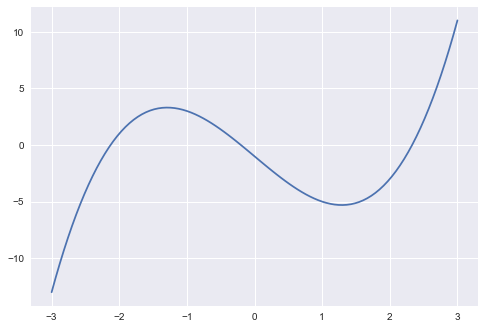

In [22]:
import matplotlib.pyplot as plt 
import numpy as np

def f(x):
    return x**3-5*x-1

X = np.linspace(-3, 3, 100)
plt.plot(X, f(X));

In [23]:
a = -3 # startverdien
terskel = 0.000001
steg = 0
while abs(f(a))>terskel:
    a = a-f(a)/(3*a**2-5) 
    steg = steg + 1

print(a)
print(steg)

-2.128419063846036
5


___
## Vi kan lage en funksjon!

In [24]:
def Newton(f, x=1, e=1E-6, h=1E-6):
    def df(x):
        return (f(x+h)-f(x))/h
    steg = 0
    while abs(f(x))>e:
        x = x - f(x)/df(x)
        steg = steg + 1
    return x, steg

def f(x):
    return x**3-5*x-1

In [25]:
Newton(f, x=-3)

(-2.128419063844994, 5)

In [26]:
def f(x):
    return x**2-2

Newton(f, x=1)

(1.4142135623754424, 4)

## Oppgave 8

Forklar hva som skjer galgt her: 

![Bilde](https://raw.githubusercontent.com/tork73/tork73.github.io/master/Bilder/NLoes.png)

Lag et program i Python som du kan bruke til å finne nullpunktene. 



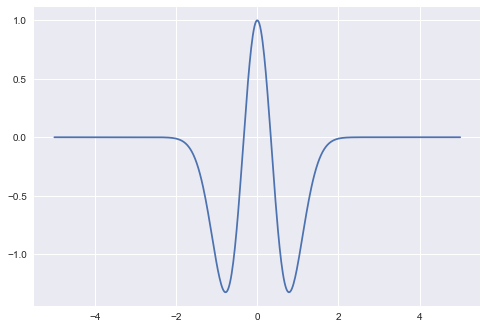

In [27]:
def f(x):
    return np.exp(-2*x**2) * (1-9*x**2)

X = np.linspace(-5, 5, 500)

plt.plot(X, f(X))
plt.show()

In [28]:
Newton(f, x=1, e=1E-8)

(3.469667422520148, 18)

In [29]:
Newton(f, x=0.2)

(0.3333333333700474, 3)


____
# Integrasjon

Vi ønsker å finne gode tilnærminger til bestemte integral

$$ \int_a^b f(x) \,\operatorname{d}x $$

In [30]:
from IPython.display import IFrame
IFrame('https://www.geogebra.org/m/vhuav56s', width=800, height=700)

# Rektangelmetoden

In [31]:
import ipywidgets as widgets
import matplotlib.pyplot as plt 
import numpy as np

def f(x):
    return 3*0.5**x

#@widgets.interact(a = (-2, 3, 0.1), b=(1, 5, 0.1), n=(1, 100, 1), Side=["Høyre", "Venstre"])
def Areal(a=0, b=3, n=4, Side="Høyre"):
    d = (b-a)/n
    if Side== "Høyre":
        X = [a+i*d+d/2 for i in range(0, n)] 
        H = [f(a+d*i) for i in range(1, n+1)]
    else:
        X = [a+i*d+d/2 for i in range(n)]
        H = [f(a+d*i) for i in range(n)]
    plt.figure(figsize=(12, 7))
    plt.style.use("seaborn")
    plt.bar(X, H, width=d, color="Skyblue", edgecolor="black")
    x = np.linspace(-1, 5, 100)
    plt.plot(x, f(x))
    plt.xlim(-1, 5)
    plt.ylim(-.1, 4)
    plt.hlines(0, -1, 5)
    plt.vlines(0, -1, 5)
    plt.text(2, 3, r"$f(x)=3\cdot 0.5^x$", fontsize="18")
    # Så regner vi ut arealet:
    areal = sum([d*y for y in H])
    plt.title(f"Arealet av rektanglene er {areal:.4f}", fontsize=20)

s = widgets.RadioButtons(
    options=["Høyre", "Venstre"],
    description='Side',
    value="Høyre",
    disabled=False
)

intervall = widgets.FloatRangeSlider(
    value=(0, 3), 
    min=-3, max=5, step=.1, 
    description='Intervall'
)
widgets.interact(Areal,
    a = (-2, 3, 0.1), b=(1, 5, 0.1), 
    n=(1, 100, 1), Side=s               
    );




interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-2.0), FloatSlider(value=3.0, descr…

## Eksempel 

Funksjonen $f$ er gitt ved  $f(x)=3\cdot e^{-x}$

Lag et Python-program som regner ut arealet under grafen til $f$ mellom 0 og 3 ved å bruke venstre Riemannsummer. 

In [32]:
import numpy as np
N = 10000
h = 3/N
def f(x):
    return 3*np.exp(-x)

S = 0
x = 0
for i in range(N):
    S = S + h*f(x)
    x = x + h

print(f"Arealet er tilnærmet lik {S:.7f}")

Arealet er tilnærmet lik 2.8510664


In [33]:
S = 0
x = 0
for i in range(N):
    S = S + h*f(x+h)
    x = x + h
print(f"Arealet er tilnærmet lik {S:.7f}")

Arealet er tilnærmet lik 2.8502112


## Oppgave 9

Bruk rektangelmetoden til å regne ut integralet $\int_{-1}^1 \sqrt{1-x^2} \; \operatorname{d}x$

In [34]:
import numpy as np
N = 10000
# Bredden på rektanglene:
h = 2/N
def f(x):
    return np.sqrt(1-x**2)

S = 0
x = -1
for i in range(N):
    S = S + h*f(x)
    x = x + h

print(f"Arealet er tilnærmet lik {S:.7f}")

Arealet er tilnærmet lik 1.5707947


In [35]:
print(2*S)
print(np.pi)

3.1415893274307796
3.141592653589793


In [36]:
import numpy as np
def f(x):
    return np.sqrt(1-x**2)
# Bredden på rektanglene:
h = 2/N
X = np.linspace(-1, 1, N+1)
Y = f(X)
#S = 0
#for i in range(N):
#    S = S + h*Y[i]
S = h * np.sum(Y[0:N-1])
print(S)



1.5707906639152958


# Trapesmetoden

In [53]:
import ipywidgets as widgets
import matplotlib.pyplot as plt 
import numpy as np

def f(x):
    return 4-x**2


#@widgets.interact(a = (-2, 3, 0.1), b=(1, 5, 0.1), n=(1, 100, 1), Side=["Høyre", "Venstre"])
def ArealTrapes(n=0):
    d = 4/n

    X = [-2+i*d for i in range(0, n+1)] 
    H = [f(-2+d*i) for i in range(1, n+1)]

    plt.figure(figsize=(12, 7))
    plt.style.use("seaborn")
    for i in range(n):
        plt.fill([X[i], X[i+1], X[i+1], X[i], X[i]], [0, 0, f(X[i+1]), f(X[i]), 0],  facecolor="r", edgecolor="black",alpha=.5, lw=2)
    x = np.linspace(-5, 5, 100)
    plt.plot(x, f(x))
    plt.xlim(-3, 3)
    plt.ylim(-.1, 5)
    plt.hlines(0, -3,3)
    plt.vlines(0, -1, 5)
    # Så regner vi ut arealet:
    areal = sum([d*(f(X[i])+f(X[i+1]))/2 for i in range(n)])
    plt.title(f"Arealet av rektanglene er {areal:.4f}", fontsize=20)

widgets.interact(ArealTrapes,
    a = (-2, 3, 0.1), 
    b=(1, 5, 0.1), 
    n=(1, 100, 1)
    );


interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

### Analytisk svar: 

\begin{alignat*}{1}
\int_{-2}^2 (4-x^2) \,\operatorname{d}x & = \left[ 4x-\frac{1}{3}x^3\right]_{-2}^2\\
& = 4\cdot 2 - \frac{1}{3}\cdot 2^3-\left(4\cdot (-2)-\frac{1}{3}\cdot(- 2)^3\right)\\
&=\frac{32}{3} \approx 10.66666667
\end{alignat*}

## Oppgave 10

Funksjonen $f$ er gitt ved $f(x)=5-\frac{1}{5}x^2$. 

Regn ut arealet mellom grafen til $f$ og $x$-aksen ved å bruke trapesmetoden.  

In [38]:
def f(x):
    return 5 - 1/5 * x**2

start = -5
slutt = 5
N = 100000
bredde = (slutt - start)/N
S = 0 # (Dette skal bli arealet)
x = start
for i in range(N):
    S = S + (f(x)+f(x+bredde))/2 * bredde
    x = x + bredde

print(S)

33.33333332997975


## Oppgave 11

Lag en funksjon Trapes som du kan bruke til å regne ut integraler med. Den skal være på formen

> Trapes(f, a, b, N=50)

Her skal f være funksjonen, a nedre grense, b øvre grense og N antall punkter du deler inntervallet i. Da må N være et partall. 

Test Trapes på $\displaystyle \int_0^3 \frac{1}{2}x^3 dx$. 

In [39]:
def Trapes(f, start, slutt, N=100):
    """
    Bruker trapesmetoden til å regne ut det bestemte integralet
    til f fra start til slutt. Bruker N trapser. 
    """
    bredde = (slutt - start)/N
    S = 0 # (Dette skal bli arealet)
    x = start
    for i in range(N):
        S = S + (f(x)+f(x+bredde))/2 * bredde
        x = x + bredde
    return S



In [40]:
def f(x):
    return 1/2*x**3
Trapes(f, 0, 3)

10.126012499999986

In [41]:
Trapes(f, -5, 5)

-1.4299672557172016e-13

---

<img src="https://upload.wikimedia.org/wikipedia/en/c/ca/Simpsons_cast.png">

# Simpsons metode

In [42]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt 

def para(a=4, h=1):
    X = np.linspace(-3, 8, 100)
    def f(x):
        return 7-.5*(x-a-.6)**2
    plt.figure(figsize=(15, 6))
    plt.axis("off")
    plt.plot(X, f(X), lw=2, color="r")
    plt.xlim(-5, 10)
    plt.ylim(-2, 10)
    plt.hlines(0, -4, 8)
    plt.vlines(0, -4, 10)
    section = np.linspace(a-h, a+h)
    plt.fill_between(section,f(section), color="cornflowerblue")
    plt.scatter([a-h, a, a+h], [f(a-h), f(a), f(a+h)], color="k", lw=3)
    if a != 0:
        plt.text(a-h, f(a-1), r"$(a-h, y_V)$", fontsize=18, horizontalalignment='right', verticalalignment='center')
        plt.text(a, f(a)+.2, r"$(a, y_V)$", fontsize=18, horizontalalignment='center', verticalalignment='bottom')
        plt.text(a+h, f(a+1)+.2, r"$(a+h, y_V)$", fontsize=18, horizontalalignment='left', verticalalignment='center')
    else:
        plt.text(a-h, f(a-h), r"$(-h, y_V)$", fontsize=18, horizontalalignment='right', verticalalignment='center')
        plt.text(a, f(a)+.2, r"$(0, y_V)$", fontsize=18, horizontalalignment='center', verticalalignment='bottom')
        plt.text(a+h, f(a+h)+.2, r"$(h, y_V)$", fontsize=18, horizontalalignment='left', verticalalignment='center')
    ;

widgets.interact(para,a = (-2, 5, 0.1), h=(0.1, 2, 0.01));


interactive(children=(FloatSlider(value=4.0, description='a', max=5.0, min=-2.0), FloatSlider(value=1.0, descr…

Vi ønsker først å finne et funksjonsuttrykk $g(x)$ for parabelen. Deretter vil
vi regne ut arealet under denne grafen med vanlig analytisk metode.

Vi vet at $g(x)=a x^2 + b x + c$. Setter vi inn de tre punkta, får vi følgende
likningssystem:
\begin{alignat*}{1}
  y_V &=a h^2 -h\cdot b + c \\
  y_M &=c \\
  y_H &= a h^2 +h\cdot b +c
\end{alignat*}
Vi ser at $c = y_M$.

Adderer vi den første og den tredje likningen, får vi

\begin{alignat*}{1}
  y_V+y_H &= 2ah^2+2c \\
    & \Updownarrow \\
    2ah^2 &= y_V-2y_M+y_H
\end{alignat*}

Vi behøver ikke å finne løsningen for $a$, $b$ og $c$ for å finne
arealet. Uttrykket over vil være tilstrekkelig. Vi får nemlig
\begin{alignat*}{1}
  \int_{-h}^h g(x)\,\operatorname{d}x & = \left[ \frac{1}{3}ax^3 +\frac{1}{2}b x^2
    +cx\right]_{-h}^h \\[2mm]
  &=\frac{2}{3}ah^3+2ch \\[2mm]
  &= \frac{h}{3}\left(2ah^2+6c \right) \\[2mm]
  &=\frac{h}{3}\left(y_V-2y_M+y_H+6y_M\right) \\[2mm]
  &= \frac{h}{3}\left(y_v+4\cdot y_M+ y_H\right)
\end{alignat*}
Vi har med andre ord vist at arealet avgrenset av en parabel i et intervall
med lengde $2h$ er $\frac{h}{3}$ multiplisert med summen av høyden av den
venstre <<kanten>> og den høyre kanten og fire ganger høyden i midten av
intervallet.

Anta nå at vi deler opp et intervall i $n$ like store delintervall (slik vi
gjorde for trapesmetoden). Anta videre at $n$ er et partall, sik at vi kan
lage $n/2$ delintervall, der det venstre punktet i intervallet, midpunktet i
intervallet og det høyre punktet i intervallet er punkt i oppdelingen
vår. Hvert av disse intervallene har bredde $h = \frac{b-a}{n}$. Vi lar
$y_k = f(x_k)$. Vi kan nå finne en god tilnærmet verdi for integralet ved å
summere opp følgende verdier:
\begin{alignat*}{1}
  \int_{x_0}^{x_2}f(x)\,\operatorname{d}\!x &\approx \frac{h}{3}\left(y_0+4y_1+y_2\right)\\
    \int_{x_2}^{x_4}f(x)\,\operatorname{d}\!x &\approx \frac{h}{3}\left(y_2+4y_3+y_4\right)\\
       \int_{x_4}^{x_6}f(x)\,\operatorname{d}\!x &\approx \frac{h}{3}\left(y_4+4y_5+y_6\right)\\
      \vdots & \\
  \int_{x_{n-4}}^{x_{n-2}}f(x)\,\operatorname{d}\!x &\approx \frac{h}{3}\left(y_{n-4}+4y_{n-3}+y_{n-2}\right)\\
    \int_{x_{n-2}}^{x_n}f(x)\,\operatorname{d}\!x &\approx \frac{h}{3}\left(y_{n-2}+4y_{n-1}+y_n\right)\\
  \end{alignat*}

___

 $$\int_a^b f(x)\,\operatorname{d}\!x\approx \frac{h}{3}\cdot(y_{start}+y_{slutt}+2\cdot y_{partall} + 4\cdot y_{odde})$$
___

## Eksempel

Regn ut $\displaystyle \int_0^4 (x^2+3x+1)\operatorname dx$ 

In [43]:
def f(x):
    return x**2+3*x+1

Areal = 2/3 * (f(0)+4*f(2)+f(4))
print(Areal)

49.33333333333333


## Eksempel

Regn ut $\displaystyle \int_0^3 e^x dx$

In [44]:
import numpy as np
def f(x):
    return np.exp(x)

Areal = 1.5/3*(f(0)+4*f(1.5)+f(3))
print(Areal)
    

19.506146602269965


In [45]:
Trapes(f, 0, 3, N=10000)

19.085537066331455

## Eksempel

Regn ut $\displaystyle \int_0^2 2^x \operatorname{d}\!x$ ved å bruke Simpson. 

## Oppgave 12

Lag en funksjon Simp som du kan bruke til å regne ut integraler med. Den skal være på formen

> Simp(f, a, b, N=50)

Her skal f være funksjonen, a nedre grense, b øvre grense og N antall punkter du deler inntervallet i. Da må N være et partall. 

Test Simp på $\int_0^\pi \sin x $

In [46]:
def Simp(f, start, slutt, N=50):
    """
    Bruker Simpsons metode til å regne ut intergralet. 
    Her er f funksjonen, start og slutt øvre og nedre grense 
    og N antall punkt i oppdelingen. 
    Dersom N ikke er partall, brukes N+1. 
    """
    if N % 2 == 1:
        N = N + 1
    X = np.linspace(start, slutt, N+1)
    Y = f(X)
    h = X[1]-X[0]

    S = h/3*(Y[0]+Y[-1])

    for i in range(2, N, 2):
        S = S + h/3*2*Y[i]

    for i in range(1, N, 2):
        S = S + h/3*4*Y[i]
        
    return S

In [47]:
def f(x):
    return np.sin(x)

S =Simp(f, 0, np.pi, N=101)
print(S)

2.0000000100001225


In [48]:
from IPython.display import Video

Video("coding-chatt.mp4", width=600)